In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from nnfabrik.builder import get_data, get_model, get_trainer

from neuralpredictors.training import (
    LongCycler,
    MultipleObjectiveTracker,
    early_stopping,
)

# loading the SENSORIUM dataset
filenames = ['data/static26872-17-20-GrayImageNet-94c6ff995dac583098847cfecd43e7b6.zip', ]

dataset_fn = 'sensorium.datasets.static_loaders'
dataset_config = {'paths': filenames,
                 'normalize': True,
                 'include_behavior': False,
                 'include_eye_position': False,
                 'batch_size': 128,
                 'scale':0.25,
                 }

dataloaders = get_data(dataset_fn, dataset_config)

In [2]:
import os 

path = 'data/static26872-17-20-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/responses'
n_files = len(os.listdir(path))
responses = []
for i in range(n_files):
    res = np.load(path+f'/{i}.npy')
    responses.append(np.expand_dims(res, axis=0))

In [3]:
responses = np.concatenate(responses, axis=0)

In [4]:
responses.shape

(6955, 7776)

Median and Mean over data in figure range for neuron 21: 13.880962 23.52102 25.04233
Median and Mean over data in figure range for neuron 61: 9.521699 15.920856 17.941347
Median and Mean over data in figure range for neuron 91: 6.161741 12.497838 16.73361


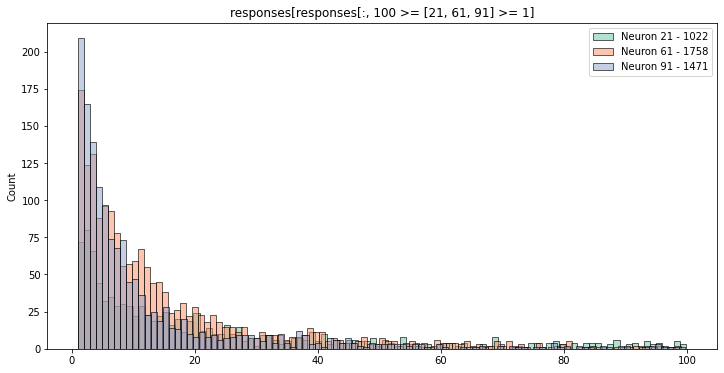

In [5]:
import seaborn as sns

ub, lb = (100, 1)
neuron_id_list = [21, 61, 91]#50, 47]  
# neuron_id_list = [21, 69, 91, 90, 52, 64, 72, 56, 49, 50, 44,  8, 10,  3, 88, 33, 47]
#        16, 82, 73, 70,  0,  4, 32, 89, 40, 77, 42,  7, 30, 20, 14, 96, 68,
#        78, 79, 55, 94, 58, 34, 35, 22, 98, 12, 75, 13, 54, 39, 80, 87, 24,
#        31, 86, 92, 60, 11, 57, 62, 95, 36,  1, 74, 38, 41, 99, 59, 61,  2,
#        65, 23, 97, 53,  6, 17, 29, 46, 76, 15, 83,  9, 71, 19, 67, 81, 48,
#        85,  5, 93, 26, 43, 63, 27, 66, 45, 28, 25, 37, 18, 84, 51]   # by corr

# Use a Seaborn color palette
palette = sns.color_palette("Set2", n_colors=len(neuron_id_list))

plt.figure(figsize=(12, 6))
for i, neuron_id in enumerate(neuron_id_list):
    filtered_data = responses[(ub >= responses[:, neuron_id]) & (responses[:, neuron_id] >= lb), neuron_id]
#     print(f"Median and Mean over all data for neuron {neuron_id}:", np.median(responses[:, neuron_id]), np.mean(responses[:, neuron_id]))
    print(f"Median and Mean over data in figure range for neuron {neuron_id}:", np.median(filtered_data), np.mean(filtered_data), np.std(filtered_data))
#     sns.axvline(x = np.mean(responses[:, neuron_id], color = palette[i])
    sns.histplot(filtered_data, bins=100, label=f'Neuron {neuron_id} - {len(filtered_data)}', alpha=0.5, color=palette[i])

plt.title(f'responses[responses[:, {ub} >= {neuron_id_list} >= {lb}]')
plt.legend()
plt.show()
plt.show()

In [6]:
(ub >= responses[:, neuron_id]) & (responses[:, neuron_id] >= lb)

array([False, False, False, ..., False, False, False])

In [7]:
ub >= responses[:, neuron_id]

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
np.log(responses[:, 21])

array([-16.503746  , -15.619617  , -17.686039  , ..., -16.690353  ,
        -0.28295246, -15.634479  ], dtype=float32)

In [9]:
arr = np.log(responses[responses[:, 21]>0, 21])

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          2.,   2.,   3.,  10.,   7.,  16.,  23.,  31.,  76., 107., 164.,
        236., 309., 368., 386., 372., 321., 287., 226., 161., 144., 113.,
         65.,  61.,  33.,  21.,  21.,  12.,   5.,   4.,   5.,   3.,   3.,
          0.,   0.,   1.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   2.,   2.,   4.,   3.,   6.,   8.,   5.,  11.,  15.,
          9.,  24.,  32.,  32.,  30.,  44.,  71.,  60.,  58.,  63.,  80.,
         89.,  95.,  95.,  65.,  78.,  59.,  61.,  73.,  62.,  53.,  43.,
         11.]),
 array([-2.3778784e+01, -2.3481422e+01, -2.3184059e+01, -2.2886698e+01,
        -2.2589334e+01, -2.2291973e+01, -2.1994612e+01, -2.1697248e+01,
        -2.1399887e+01, -2.1102526e+01, -2.0805162e+01, -2.0507801e+01,
        -2.0210438e+01, -1.9913076e+01, -1.9615715e+01, -1.9318352e+01,
        -1.9020990e+01, -1.872

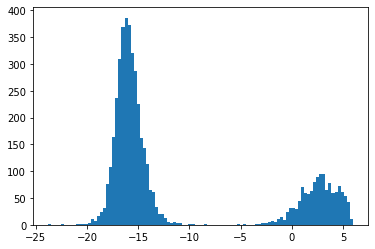

In [10]:
plt.hist(arr, bins=100)

Median and Mean over data in figure range for neuron 21: 13.880962 23.52102 25.04233
Median and Mean over data in figure range for neuron 37: 4.2750115 7.8484783 10.4186945
Median and Mean over data in figure range for neuron 75: 6.424845 11.908856 15.320367
Median and Mean over data in figure range for neuron 60: 5.8590693 11.648198 15.721703


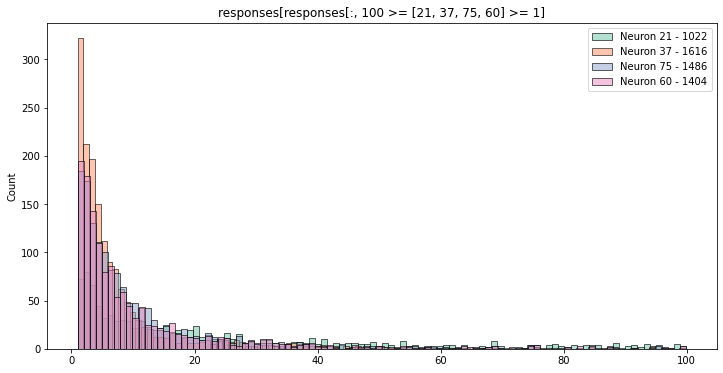

In [11]:
import seaborn as sns

ub, lb = (100, 1)
neuron_id_list = [21, 37, 75, 60]#50, 47]  
# neuron_id_list = [21, 69, 91, 90, 52, 64, 72, 56, 49, 50, 44,  8, 10,  3, 88, 33, 47]
#        16, 82, 73, 70,  0,  4, 32, 89, 40, 77, 42,  7, 30, 20, 14, 96, 68,
#        78, 79, 55, 94, 58, 34, 35, 22, 98, 12, 75, 13, 54, 39, 80, 87, 24,
#        31, 86, 92, 60, 11, 57, 62, 95, 36,  1, 74, 38, 41, 99, 59, 61,  2,
#        65, 23, 97, 53,  6, 17, 29, 46, 76, 15, 83,  9, 71, 19, 67, 81, 48,
#        85,  5, 93, 26, 43, 63, 27, 66, 45, 28, 25, 37, 18, 84, 51]   # by corr

# Use a Seaborn color palette
palette = sns.color_palette("Set2", n_colors=len(neuron_id_list))

plt.figure(figsize=(12, 6))
for i, neuron_id in enumerate(neuron_id_list):
    filtered_data = responses[(ub >= responses[:, neuron_id]) & (responses[:, neuron_id] >= lb), neuron_id]
#     print(f"Median and Mean over all data for neuron {neuron_id}:", np.median(responses[:, neuron_id]), np.mean(responses[:, neuron_id]))
    print(f"Median and Mean over data in figure range for neuron {neuron_id}:", np.median(filtered_data), np.mean(filtered_data), np.std(filtered_data))
#     sns.axvline(x = np.mean(responses[:, neuron_id], color = palette[i])
    sns.histplot(filtered_data, bins=100, label=f'Neuron {neuron_id} - {len(filtered_data)}', alpha=0.5, color=palette[i])

plt.title(f'responses[responses[:, {ub} >= {neuron_id_list} >= {lb}]')
plt.legend()
plt.show()
plt.show()

# Tailness Analysis

In [23]:
from scipy.stats import kurtosis

In [24]:
kurtosis(filtered_data)

9.322416274308999

In [43]:
# % dip in correlation from the max correlation for 100 neurons

# arr = [37, 51, 45, 75, 66, 27, 60, 63, 83, 43, 18, 74, 15, 35, 57, 28, 84,
#        85, 19, 99, 12, 38, 77, 31, 71, 25, 39, 13, 95,  1, 34, 36, 76, 26,
#        96, 79, 93, 73, 64, 97, 92, 46, 48,  2, 23,  6, 17, 33, 68, 94, 98,
#        16, 86, 53, 69, 32, 65, 42,  0, 88, 81, 54, 14, 61, 40, 50, 89, 67,
#        78, 29, 82,  3, 90, 52, 70, 56, 22, 87, 80,  4, 11, 55, 62, 58, 20,
#        10, 24,  8, 41, 47, 49, 72,  7, 21, 91, 44,  5, 30,  9, 59]

arr = [6159, 4178, 1890, 1845, 6627,  121, 4400, 3643, 3995,  174, 5682,
       3805, 3121, 6142, 7297, 4770, 6503, 3527,  595, 1310, 6393, 2526,
       1019, 1922,  472, 3097, 6801, 2223, 6753, 7221, 3332,  870,  392,
       3819, 6736, 2935, 2130, 4604, 4906,  547,  465, 5806,  898, 6567,
       2439, 6243, 6697, 5076, 5513, 2114, 5197, 1035, 3732, 4825, 4744,
       5947, 5059,  452, 7172, 7354, 1785, 6338, 1354, 4445, 6595,  344,
       4506, 7342, 6887, 2717, 6281, 7706, 1220, 4925, 6872, 4809, 7214,
       2438,  677, 3629, 2940, 3061, 6527,  115, 7316, 3440, 1369, 2872,
       6327, 1428, 6279, 6096, 5014, 1015, 7392, 6020, 1961, 2713, 2793,
       2398, 5278,  784, 6520, 4556,  936, 4567, 2292, 5622, 1324, 1125,
       6982, 6105, 6553, 2361,  310, 4456, 1215,  487, 6396, 2195, 4072,
       5090, 1406, 2224, 7375,  341,  664, 1926, 7639, 4195, 7174,  944,
       7666, 7341, 4862, 3775, 1439, 6634,  173, 2995, 4074, 5136, 2953,
       7244, 3104,  768, 7191, 6214, 4919, 2140, 6093, 7405, 4795,  816,
       5791, 4477, 7343, 4080, 3051, 4222, 6204, 4967, 5972, 1356, 6526,
        526, 2614, 2921,  146, 6726, 3822,  596,  702,  347, 2540, 6537,
       5766, 5711, 5043, 7580,  582, 2025,  605, 4804, 5798, 4205, 6948,
       7235, 3286, 3958, 2334,  644, 2498, 5142, 4397, 3769, 3088, 4393,
       6877, 2645, 3509, 4728, 7323, 3954, 3695, 4889, 4933, 2069,  581,
       5188, 3041,  549,  878, 1352, 2488, 4747, 6365, 3535, 4724,  429,
       1187,  412, 7460, 3810, 1279, 3924, 5674, 4186, 7601,  381,  416,
       4005, 3685, 3692, 1402, 7478, 2626, 3115, 2669, 4277, 6309, 2282,
       4798, 1401, 1899, 1110, 1413,  359, 2086, 5574,  235, 1724, 4000,
       5664, 4285, 2948, 7081, 3650, 1868, 6966, 2200, 2796, 1876, 1532,
       6398, 4463, 6646,  685, 3333, 5486, 5000, 6437, 1872, 7555, 5315,
       6556, 4818, 4697, 2901, 5531, 5881, 5799, 6120,  357, 5091, 5293,
       4493, 3766, 7467, 4800,  684,   63, 1099, 3434,  980, 1017, 5235,
       5194,  376, 7068, 5801, 5046, 1758, 2164, 5812, 2866, 1856, 1416,
       1943, 6702, 2087,  133, 3011,  422, 2218, 2603, 6099, 6171, 2010,
       1088, 1991, 1273, 5877, 5008, 1365, 5322, 5691, 5029, 5837, 6312,
       6896, 2946, 1853,  321, 5516, 6382, 3449, 3994, 4116, 6621, 6714,
       1397, 5199, 6073, 4207, 3808, 5585, 6679, 1948, 6543, 2211, 4208,
       3193,  298, 5609, 1393, 7373, 4888,  514, 2663, 6518, 6463, 2059,
        849, 6825, 5639, 6961, 7631, 4390, 5818, 3666, 3014, 3326, 5589,
        668, 5634, 5309, 7428, 1311, 2598, 5915, 7419, 7590, 7495, 7232,
       4635, 7393, 3625, 1264, 2707,  594, 7475, 7198, 1082,   83,  616,
       1448, 2846, 5762, 5761, 2117, 2830, 7681, 5606, 1650, 1288, 5346,
       7617, 3102, 5219, 6990,  678, 3298, 2807, 3240, 6699,  254, 6875,
       2256, 5770, 2088, 4714,  492, 5912, 1975, 4199, 6310, 3178, 3801,
       7682, 4597, 6718, 3864, 1894, 7291, 1630, 3902, 4433, 7246,   43,
       1360, 1963, 1265, 5241,  228, 5386, 3860, 4194, 3945, 6043, 7573,
       1487, 6639, 4204, 3710, 1332, 7108, 5804, 2801, 4291, 7642,  559,
       5010, 3199, 7329, 5131, 2402, 5206, 5754,  189, 4628, 4114, 6890,
       6481, 2728, 3085, 4041,  443, 5037, 6098, 1189, 1495, 2616, 7047,
       2653, 4619, 4010, 7670, 1930, 6662, 7184, 5295, 6060, 1050, 2392,
       4233, 5098, 6529,  908, 3352, 6153, 3006, 1940, 1793, 5755, 3173,
        764, 4926, 7751, 2422, 5283, 2679, 5751, 1065,   18, 4421,  689,
       4588, 4045, 3112, 2109,  525,  695, 4533, 7040, 1791, 2752, 5254,
       5790, 6090,  925, 7192, 4583, 2452, 6893,  745, 6083, 5144, 5107,
       5833, 1076, 5769, 6425, 1611, 3658, 1249,  427, 3420, 5697, 1062,
       6140, 6724, 3408, 3364, 3438, 5271, 7351, 4602, 1005,  630, 4258,
       5862, 7071, 2736, 5397, 2591, 4319, 4813, 1137, 4702, 4145, 4841,
       3244, 1605, 3802, 4977, 4534, 2806,  238, 2875,  631, 3814, 6766,
       4355, 1475, 1797,  740, 1668, 2363, 7544, 3714,  225, 3208, 4834,
       3177, 4904, 4756, 3796, 6906, 7756, 3261, 4286, 1966, 6564, 6898,
        796, 2447, 3782, 7043, 3632, 1127, 2052,  607,  866, 2118, 2273,
       2564, 2690, 3368, 4854, 3871, 4912, 4727, 6568, 5563,  450, 6277,
       5967, 3416, 3355, 1707, 4591,  729, 5938, 3248,  482, 3852, 3057,
        355, 1713, 4553, 2925, 2287, 4839,  673, 4815, 5368, 7501, 2743,
        354, 5473, 1259,  197, 3987, 6291, 4745, 1728, 7479, 6023, 3724,
       3564, 3734, 6191, 3568, 4876, 7117, 4790, 1493, 1741, 3259, 5522,
       5759, 5980, 6837, 4665, 6605, 2345,  587, 5482, 1998, 3970, 5733,
       7372, 2874, 3310, 5185, 3128, 4566, 1456, 5097, 4173, 2290, 3682,
       2485, 1385, 2210, 4435,  927, 3820, 2037, 2160,  658, 4060, 4348,
        696, 4088, 2758, 7276, 1902, 4902, 2221, 2523, 6379,  628,  926,
        751, 6603, 1738, 1213,  179, 6193,  734, 4826,  395, 4504, 6313,
       6810, 1269, 7154,  204, 3473, 3401, 5604, 6219, 5515, 6802, 4242,
       6546, 5689, 1813, 5695, 3468,  150, 5968,  615, 4830, 1337,  868,
       2321, 3118, 6469, 2004, 5181, 6845, 2913, 1447, 7116, 3952, 5326,
       7242, 5666, 2478, 6260, 6764, 2962, 3720, 5529,  124, 3237, 3690,
       2254, 1483, 7118, 3280, 2235, 2027, 1138, 5817, 4683, 2544,  992,
        690, 5767,  737, 4563, 2175, 2465,  451,  350, 2635, 3090, 2369,
       2661, 2779, 5878, 7352, 2791, 4911, 4643,  806, 4349, 6653, 3593,
       1421, 5083, 2329, 3534, 7632, 3063, 1742, 2631,  647, 5297, 2346,
       5970, 6133, 4982, 2003, 1275, 6698, 3084, 6395, 4455, 3158, 5317,
       5591, 1366, 6106, 2185, 4425, 3910,  180, 7275, 5111, 4261, 5842,
       5094, 3791, 6128, 5935, 2278,   74, 3366, 2831, 4652, 1496, 6378,
       4389, 3972, 2571, 5746, 7769, 4271, 6107, 5712,  568, 5288, 5569,
        672, 5534, 2722,  207, 2391, 5995, 6860, 2424, 2951, 1479, 7767,
       1800, 2528, 4046, 1422, 1232, 5998, 2332, 5349,  322, 2827, 7738,
       4532, 4263, 2443, 5957, 4431, 3012, 1747, 1434, 3032, 3930,  629,
       6610, 5979, 4209, 6156, 3776, 4732,  782,  201, 6614,  372,  103,
       1523, 3855, 4262, 5417, 3362, 2293, 1598, 3187, 6865, 4934, 7065,
       2811, 3893, 4758, 4318,  610, 2668, 6748, 7104, 5296, 2451, 6949,
       4562, 3291,  165, 7388, 5344, 3973,  511, 1981, 4742, 3499, 6829,
         15, 1757, 4057, 4485, 5365,  183,  752,  959, 1828, 7701, 6889,
       2058, 1238, 3215, 3082, 2778, 1784, 3719, 1056,   35,  820, 3867,
       5395, 5214, 3831, 5681, 6885, 2234, 6192, 4373, 7689, 6727, 1851,
         57, 4063, 6112, 7095, 4848, 1695, 7616, 3610, 7746, 1604, 3890,
       6888, 2162, 7158, 5528, 1980, 4663, 2257,  462, 5449, 6659, 3137,
       6392, 1659,  444, 6573, 2681, 2787, 3712, 7391, 3396, 1710]

In [44]:
kur_arr = []
ub, lb = (100, 1)
for neuron_id in arr:
    filtered_data = responses[(ub >= responses[:, neuron_id]) & (responses[:, neuron_id] >= lb), neuron_id]
    kur_arr.append(kurtosis(filtered_data))

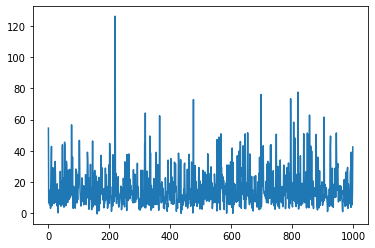

In [45]:
plt.plot(kur_arr)

In [39]:
responses.shape

(6955, 7776)